# HW2: Application Questions

CS 539 Machine Learning

Aukkawut Ammartayakun

In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 1. Linear Regression Problem (25 points)

We will use the Real estate valuation data set.xlsx dataset to 
build different regression models. The dataset includes 6 predictors, and one response variable. In the 
dataset, X1 represents the transaction date; find the earliest transaction date and set that as a reference 
time – ie, subtract that from all transaction dates. 

(1) Visualize the dataset; visualization step includes (not limited) to: a) histogram of individual predictors and response, and b) scatter plots for pairs of predictors and also pairs of predictor and response variable. Discuss you observation on possible outlier data points, and possible predictive 
power (correlation). 

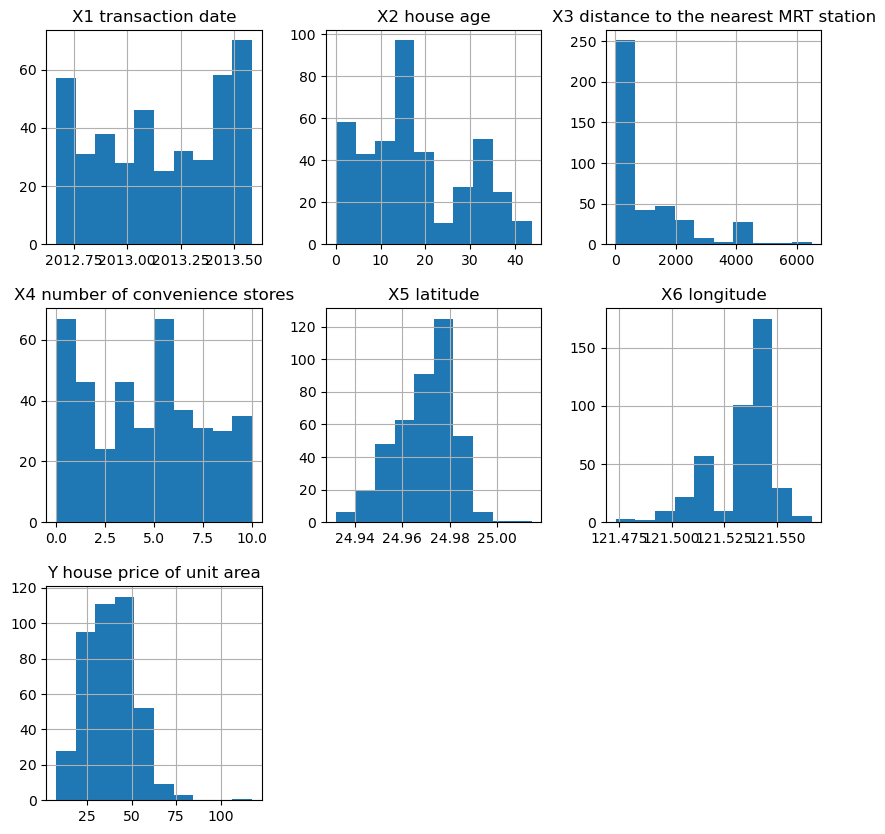

In [5]:
#read xlsx file
data = pd.read_excel('Real estate valuation data set.xlsx', index_col=0)
#histogram of individual variables
data.hist(figsize=(10,10))
plt.show()

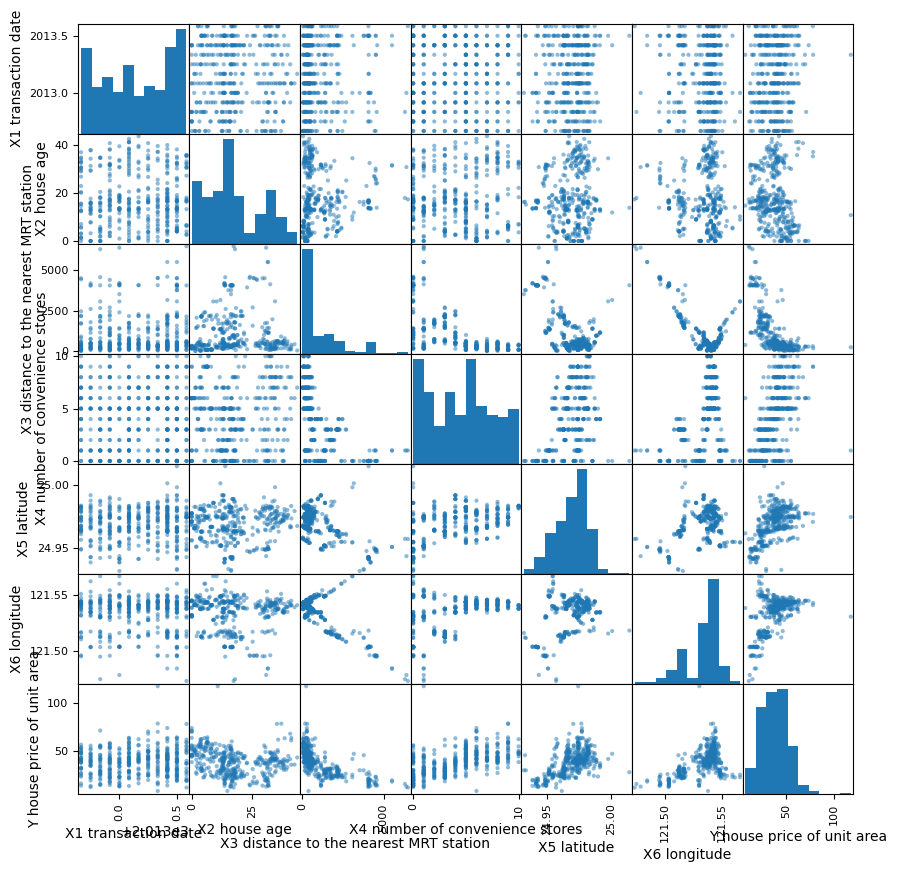

In [7]:
#scatter plot for each pair of variables
pd.plotting.scatter_matrix(data, figsize=(10,10))
plt.show()

In [8]:
#correlation matrix
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


(2) Build a linear regression model using all of predictors (no basis function) and discuss your model outcome (predicted weights, price as a function of time, and RMSE). 

In [10]:
#linear regression with all variables
def linear_regression(x, y):
    '''
    This function performs linear regression on the given data
    Input: x - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    Output: beta - vector of regression coefficients
    '''
    #add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    #compute beta
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

def RMSE(x, y, beta):
    '''
    This function computes the root mean squared error of the linear regression
    Input: x - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    beta - vector of regression coefficients
    Output: rmse - root mean squared error
    '''
    #add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    #compute rmse
    rmse = np.sqrt(np.sum((y - x @ beta)**2)/x.shape[0])
    return rmse

#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
beta = linear_regression(x, y)
print('Regression equation: y = ', beta[0], ' + ', beta[1], 'x1 + ', beta[2], 'x2 + ', beta[3], 'x3 + ', beta[4], 'x4 + ', beta[5], 'x5 + ', beta[6], 'x6')
print('RMSE: ', RMSE(x, y, beta))



Regression equation: y =  -14441.984771508674  +  5.149017273800987 x1 +  -0.2696967341110219 x2 +  -0.004487508086205817 x3 +  1.1333249843804976 x4 +  225.4701444568154 x5 +  -12.429045575450473 x6
RMSE:  8.782312975361176


(3) Build a Bayesian regression model using all of predictors (no basis function) and discuss your 
model outcomes (predicted weights and their confidence interval, prediction of response variable 
for the training set and their confidence interval). Build the model for different values of $\lambda = \frac{\alpha}{\beta}$ -- here, you can pick: $\lambda_1=1$, $\lambda_2 = 10$, and $\lambda_3 =100$. 

In [42]:
def bayesian_regression(X, y, alpha, beta):
    '''
    This function performs Bayesian linear regression without basis on the given data
    Input: X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    alpha - prior precision
    beta - precision of the likelihood
    Output: m - vector of regression coefficients
    s - covariance matrix
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N, D = X.shape
    I = np.eye(D)
    s_inv = alpha * I + beta * X.T @ X
    s = np.linalg.inv(s_inv)
    m = beta * s @ X.T @ y
    
    return m, s

def predict(X, m):
    '''
    This function computes the predicted values of y
    Input: X - matrix of independent variables where each row is a data point
    m - vector of regression coefficients
    Output: y_pred - vector of predicted values
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ m

def bayesian_RMSE(X, y, m):
    '''
    This function computes the root mean squared error of the Bayesian linear regression
    Input: X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    m - vector of regression coefficients
    Output: rmse - root mean squared error
    '''
    y_pred = predict(X, m)
    return np.sqrt(np.sum((y - y_pred)**2)/X.shape[0])
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 1, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))


Regression equation: y =  -0.0833759877208711  +  0.6010806184702872 x1 +  -0.2538724271002477 x2 +  -0.005471080414342304 x3 +  1.2854055173761274 x4 +  7.159702067747099 x5 +  -11.071921372768806 x6
RMSE:  9.157257899031816


In [43]:
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 10, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))

Regression equation: y =  -0.009179717604460208  +  0.08747272538138648 x1 +  -0.2528527421581471 x2 +  -0.005398677442221467 x3 +  1.290155818811765 x4 +  0.7306902239387026 x5 +  -1.2449470391267892 x6
RMSE:  9.200002706860499


In [44]:
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 100, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))

Regression equation: y =  -0.0009218757446220159  +  0.02816258578662402 x1 +  -0.25150489674075444 x2 +  -0.005458752612126281 x3 +  1.2419917116328774 x4 +  0.07394553430683522 x5 +  -0.12567740251339715 x6
RMSE:  9.205844835815357


(4) Pick two predictors ($X_2$ and $X_3$) and standardize these features (Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation). Use 7 Gaussian basis with their means on $\mu=(−3,−2,−1,0,1,2,3)$ and $s=1$ per each predictor. Build Bayesian regression model and discuss your prediction. Here, you can check the model performance for different values of $\lambda = \frac{\alpha}{\beta}$

(5) We want compare evidence of two different models. The one which is built using all of predictors (part 2) and the second one which is built based on 7 Gaussian basis for two predictors (part 4). We compare: 
$$\ln(p(D)) \cong \ln(p(D|\theta_{MAP}))-\frac{1}{2}M\ln(N)$$
which is defined in Bishop textbook chapter 4, equation (4.139). Discuss how you find $\theta_{MAP}$, and which model has a higher evidence (note, the prior on $\theta$ is broad).  

(6) Cross validation technique is widely used in ML. In fact, cross validation is a sampling solution to what we are doing in part 5 using a Bayesian viewpoint. Using 10-fold cross validation, compare prediction accuracy (RMSE) of models we built in part 3 and 4. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

## 2. Classification Problem (25 points)

We will use ENB2012_data.xlsx dataset to build different classifier. 
The dataset includes 8 predictors, and two response variables ($y_1$, and $y_2$). We create 1 and 0 label based on the difference between $y_1$ and $y_2$ (ie, $y_1-y_2$). If $y_1-y_2$ is larger than zero, we label that as 1 and otherwise 0 (this defines our class label).  

(1) Visualize the dataset; here, you plot the histogram of each predictor given two labels. Discuss which predictor have the highest predictive power. For discrete predictors, you can plot their pmf conditioned on the label. 

(2) Build a logistic regression model using all of predictors (no basis function) and discuss your model 
outcome (predicted weights, and classifier accuracy). 

(3) Using estimated weights in part 2, we have probability of two classes for each data point. Plot ROC curve for different threshold values (probability of class 1 larger than threshold, you will assign to 
class 1). Plot the accuracy as a function of threshold too.

(4) Build a Bayesian regression model using all of predictors (no basis function) and discuss your model outcome (predicted weights and their confidence interval). Assume the prior is defined by $\mathcal{N}(\mathbf{0},\alpha\mathbf{I})$, where $\alpha$ is the hyperparameter. Discuss the result for $\alpha_1 = 0.1,\alpha_2 =1, \alpha_3 = 10  and $\alpha_4 = 100$.  

(5) Do 10-fold cross validation for four different models you examined in part 4 and discuss which one has the highest decision accuracy. In the prediction step, use $W_{MAP}$. 

(6) We want to calculate 
$$
p(y=1|\phi,\mathbf{t}) = \int p(y=1|\phi,\mathbf{w})p(\mathbf{w}|\mathbf{t})d\mathbf{w}
$$
using sampling technique (this is equation 4.145 from the Bishop text book). We derived a 
Gaussian approximation solution for 𝑝(w|𝐭), where we can draw samples from it. We can then 
take these samples to calculate the probability. This is defined by: 
$$
p(y=1|\phi,\mathbf{t}) \approx \frac{1}{S}\sum_{s=1}^S p(y=1|\phi,\mathbf{w}_s)
$$
where $\mathbf{w}_s$ is the sample drawn from the posterior. For
$$
\begin{align*}
X_1 &= (0.8,600.0,286.0,138.1,5,4,0.25,0)\\
X_2 &=(0.67,630.0,296.0,238.1,2,6,0.5,3) 
\end{align*}
$$
Calculate probability for the models you built in part 4 for different $\alpha$ s. 